In [63]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'database_votes.csv')
df_scrutin = pd.read_csv('database_scrutins.csv', index_col = 'idScrutin')
df_votants = pd.read_csv('database_votants.csv', index_col = 0)

### Création de deux bases : Votant et Scrutin pour mieux visualiser.

In [64]:
df_scrutin.head(10)

,date_scrutin,titre,demandeur,votants,pour,contre,non_votants,non_votants_volontaires,abstention,% pour,% abstention,adopté
idScrutin,,,,,,,,,,,,
0,2020-10-07,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",57,56,0,2,0,1,0.98,0.02,1.0
1,2019-03-15,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",35,9,26,2,0,0,0.26,0.00,0.0
2,2019-11-13,"la motion de rejet préalable, déposée par Mme ...","Présidente du groupe ""Socialistes et apparentés""",93,33,59,2,0,1,0.35,0.01,0.0
3,2017-10-19,l'amendement n° 400 de Mme Louwagie à l'articl...,"Président du groupe ""Les Républicains""",107,19,87,2,0,1,0.18,0.01,0.0
4,2018-12-04,l'amendement n° 272 de Mme Obono à l'article 5...,"Président du groupe ""La France insoumise""",41,5,36,2,0,0,0.12,0.00,0.0
5,2018-06-21,l'ensemble de la proposition de loi relative à...,"Président du groupe ""Les Républicains""",66,40,3,2,0,23,0.61,0.35,1.0
6,2020-07-30,l'amendement n° 930 de Mme Obono à l'article 4...,"Président du groupe ""La France insoumise""",85,8,75,2,0,2,0.09,0.02,0.0
7,2019-03-15,l'article 61 du projet de loi relatif à la cro...,"Président du groupe ""La République en Marche""",42,27,5,2,0,10,0.64,0.24,1.0
8,2019-05-27,"la motion de renvoi en commission, déposée par...","Président du groupe ""Les Républicains""",65,25,40,1,0,0,0.38,0.00,0.0


Remarque : le premier scrutin remonte à juillet 2017 : législature actuelle. On pourra comparer nos résultats aux proportions des sièges à l'assemblée.

In [65]:
# On regroupe par demandeur et on calcule les résultats moyens des scrutins proposés par chaque demandeur
df_scrutin_moyen = df_scrutin.groupby(['demandeur']).mean()
df_scrutin_moyen = df_scrutin_moyen.sort_values(by=['% pour'])
df_scrutin_moyen

,votants,pour,contre,non_votants,non_votants_volontaires,abstention,% pour,% abstention,adopté
demandeur,,,,,,,,,
"Président du groupe ""La République en Marche""\rPrésidente du groupe ""Socialistes et apparentés""\rPrésident du groupe ""UDI, Agir et Indépendants""\rPrésident du groupe ""Libertés et Territoires""\rPrésident du groupe ""La France insoumise""",60.0,2.0,58.0,2.0,0.0,0.0,0.03,0.00,0.0
"Président( du groupe ""Les Républicains""",68.0,4.0,64.0,2.0,0.0,0.0,0.06,0.00,0.0
"President du groupe ""La France insoumise""",238.0,26.0,209.0,2.0,0.0,3.0,0.11,0.01,0.0
"Président(e) du groupe ""Les Républicains""",57.0,6.0,51.0,2.0,0.0,0.0,0.11,0.00,0.0
"Président du groupe ""La République en Marche""\rCommission\rPrésident du groupe ""Les Républicains""",66.0,9.0,57.0,2.0,0.0,0.0,0.14,0.00,0.0
...,...,...,...,...,...,...,...,...,...
"Président du groupe ""Les Républicains""\rPrésidente du groupe ""Socialistes et apparentés""\rPrésident du groupe ""Libertés et Territoires""",106.0,105.0,1.0,2.0,0.0,0.0,0.99,0.00,1.0
"Président du groupe ""de la Gauche démocrate et républicaine""Président du groupe ""Les Républicains""Président du groupe ""La République en Marche""",70.0,69.0,0.0,2.0,0.0,1.0,0.99,0.01,1.0
"Président du groupe ""La République en Marche""\rPrésidente du groupe ""Nouvelle Gauche""",41.0,41.0,0.0,2.0,0.0,0.0,1.00,0.00,1.0


Ce qui importe ici c'est la moyenne du % pour et d'absention ainsi que la moyenne des votants pour les scrutins proposés, en fonction du demandeur ayant proposé ces scrutins.

On compte aussi le nombre de scrutins proposé par chaque coalition (on compte le nombre de fois qu'apparait chaque demandeur dans le df rassemblé par scrutin et par demandeur) 

In [4]:
df_scrutin.groupby(['idScrutin', 'demandeur']).sum().index.droplevel().value_counts()


Président du groupe "Les Républicains"                                                                                                                                                621
Président du groupe "La France insoumise"                                                                                                                                             526
Président du groupe "de la Gauche démocrate et républicaine"                                                                                                                          372
Présidente du groupe "Socialistes et apparentés"                                                                                                                                      343
Président du groupe "La République en Marche"                                                                                                                                         250
                                                                      

In [5]:
df_votants_voteParDemandeur = df_votants.drop('idScrutin', axis = 1).groupby(['idVotant', 'demandeur']).sum()

In [6]:
df_votants_voteParDemandeur

votePour  \
idVotant demandeur                                                      
PA1008   Conference des Presidents                                0.0   
         Conférence des Présidents                               19.0   
         Gouvernement                                             2.0   
         President du groupe "Les Républicains"                   2.0   
         President(e) du groupe "La Republique en Marche"         1.0   
...                                                               ...   
PA998    Président du groupe "Écologie Démocratie Solida...       1.0   
         Président du groupe de la "Gauche démocrate et ...       1.0   
         Président(e) du groupe "Les Républicains"                0.0   
         Présidente du groupe "Nouvelle Gauche"                   1.0   
         Présidente du groupe "Socialistes et apparentés"         1.0   

                                                             voteContre  \
idVotant demandeur                                                        
PA1008   Conference des Presidents                                  1.0   
         Conférence des Présidents                                 27.0   
         Gouvernement                                               2.0   
         President du groupe "Les Républicains"                     0.0   
         President(e) du groupe "La Republique en Marche"           0.0   
...                                                                 ...   
PA998    Président du groupe "Écologie Démocratie Solida...         0.0   
         Président du groupe de la "Gauche démocrate et ...         1.0   
         Président(e) du groupe "Les Républicains"                  1.0   
         Présidente du groupe "Nouvelle Gauche"                     0.0   
         Présidente du groupe "Socialistes et apparentés"           2.0   

                                                             voteAutre  
idVotant demandeur                                                      
PA1008   Conference des Presidents                                 0.0  
         Conférence des Présidents                                 0.0  
         Gouvernement                                              0.0  
         President du groupe "Les Républicains"                    0.0  
         President(e) du groupe "La Republique en Marche"          0.0  
...                                                                ...  
PA998    Président du groupe "Écologie Démocratie Solida...        0.0  
         Président du groupe de la "Gauche démocrate et ...        0.0  
         Président(e) du groupe "Les Républicains"                 0.0  
         Présidente du groupe "Nouvelle Gauche"                    0.0  
         Présidente du groupe "Socialistes et apparentés"          0.0  

[34731 rows x 3 columns]

In [7]:
df_votants_voteParDemandeur = df_votants.drop('idScrutin', axis = 1).groupby(['idVotant', 'demandeur']).sum()

df_votants_voteParDemandeur['voteTotal'] = df_votants_voteParDemandeur['votePour'] + df_votants_voteParDemandeur['voteContre'] + df_votants_voteParDemandeur['voteAutre']

df_votants_voteParDemandeur['votePour'] = np.round(df_votants_voteParDemandeur['votePour']/df_votants_voteParDemandeur['voteTotal'], 2)
df_votants_voteParDemandeur['voteContre'] = np.round(df_votants_voteParDemandeur['voteContre']/df_votants_voteParDemandeur['voteTotal'], 2)
df_votants_voteParDemandeur['voteAutre'] = np.round(df_votants_voteParDemandeur['voteAutre']/df_votants_voteParDemandeur['voteTotal'], 2)

df_votants_voteParDemandeur['idVotant'] = df_votants_voteParDemandeur.index.to_frame().idVotant
df_votants_voteParDemandeur['demandeur'] = df_votants_voteParDemandeur.index.to_frame().demandeur

df_votants_voteParDemandeur.index = range(len(df_votants_voteParDemandeur))

df_votants_voteParDemandeur

,votePour,voteContre,voteAutre,voteTotal,idVotant,demandeur
0,0.00,1.00,0.0,1.0,PA1008,Conference des Presidents
1,0.41,0.59,0.0,46.0,PA1008,Conférence des Présidents
2,0.50,0.50,0.0,4.0,PA1008,Gouvernement
3,1.00,0.00,0.0,2.0,PA1008,"President du groupe ""Les Républicains"""
4,1.00,0.00,0.0,1.0,PA1008,"President(e) du groupe ""La Republique en Marche"""
...,...,...,...,...,...,...
34726,1.00,0.00,0.0,1.0,PA998,"Président du groupe ""Écologie Démocratie Solid..."
34727,0.50,0.50,0.0,2.0,PA998,"Président du groupe de la ""Gauche démocrate et..."
34728,0.00,1.00,0.0,1.0,PA998,"Président(e) du groupe ""Les Républicains"""
34729,1.00,0.00,0.0,1.0,PA998,"Présidente du groupe ""Nouvelle Gauche"""


On commence par observer uniquement avec les 5 groupes les plus grands (les 5 demandeurs les plus importants) afin de voir si l'analyse peut être pertinente.


In [8]:
principaux_demandeurs = ['Président du groupe "Les Républicains"',
                         'Président du groupe "La France insoumise"',
                         'Président du groupe "de la Gauche démocrate et républicaine"',
                         'Présidente du groupe "Socialistes et apparentés"',
                         'Président du groupe "La République en Marche"']

In [9]:
df_votantsFirst = df_votants_voteParDemandeur[df_votants_voteParDemandeur.demandeur.isin(principaux_demandeurs)]

In [10]:
df_votantsFirst

,votePour,voteContre,voteAutre,voteTotal,idVotant,demandeur
8,0.77,0.23,0.0,124.0,PA1008,"Président du groupe ""La France insoumise"""
11,0.68,0.32,0.0,31.0,PA1008,"Président du groupe ""La République en Marche"""
24,0.62,0.38,0.0,132.0,PA1008,"Président du groupe ""Les Républicains"""
44,0.78,0.22,0.0,72.0,PA1008,"Président du groupe ""de la Gauche démocrate et..."
56,0.85,0.15,0.0,66.0,PA1008,"Présidente du groupe ""Socialistes et apparentés"""
...,...,...,...,...,...,...
34717,0.46,0.54,0.0,13.0,PA998,"Président du groupe ""La France insoumise"""
34718,0.50,0.50,0.0,4.0,PA998,"Président du groupe ""La République en Marche"""
34720,0.50,0.50,0.0,8.0,PA998,"Président du groupe ""Les Républicains"""
34725,0.44,0.56,0.0,9.0,PA998,"Président du groupe ""de la Gauche démocrate et..."


On peut essayer de voir si la proportion de vote positifs d'un votant dépendant réellement du demandeur. (par exemple fort écart-type).
Rappel : il y a 634 votants.

In [11]:
votants = df_votantsFirst['idVotant'].unique()
cols = ['votant', 'moyenne de vote positif', 'ecart type']
lst = []
for votant in votants :
    M = df_votantsFirst.loc[df_votantsFirst['idVotant'] == votant]
    m = M['votePour']
    a = votant
    b = m.mean()
    c = m.std()
    lst.append([a,b,c])
    
    

L = pd.DataFrame(lst, columns=cols)
L = L.sort_values(by=['ecart type'])
L

,votant,moyenne de vote positif,ecart type
523,PA721666,0.0000,0.000000
100,PA342601,0.6860,0.018166
124,PA606171,0.7000,0.020000
76,PA332747,0.6280,0.021679
528,PA721702,0.2540,0.027019
...,...,...,...
414,PA720672,0.4800,0.443396
41,PA267337,0.3350,0.450518
114,PA604,0.6675,0.471407
223,PA719002,0.6875,0.473242


In [12]:
G = df_votantsFirst.loc[df_votantsFirst['idVotant'] == 'PA267337']
G

,votePour,voteContre,voteAutre,voteTotal,idVotant,demandeur
1718,0.17,0.83,0.0,6.0,PA267337,"Président du groupe ""La France insoumise"""
1720,0.17,0.83,0.0,12.0,PA267337,"Président du groupe ""Les Républicains"""
1723,0.00,1.00,0.0,3.0,PA267337,"Président du groupe ""de la Gauche démocrate et..."
1726,1.00,0.00,0.0,3.0,PA267337,"Présidente du groupe ""Socialistes et apparentés"""


Par exemple, le votant PA267337 a un des plus fort écarts-type au niveau des votes de scrutin en fonction du demandeur. On peut supposer très grossièrement que les positions de celui-ci se rapprochent plus du groupe "Socialiste et apparentés" (3 votes pour sur 3 proposition du groupe) et s'éloignent plus fortement des autres groupes (pourcentage de vote pour inférieur a 20%). Néanmoins cela reste une analyse très simplifiée (ne tient pas compte de l'évolution en fonction du temps, se base sur très peu de données etc)

### Quels demandeurs ont le plus de succès ?

In [57]:
df_scrutin['refusé'] = 1 - df_scrutin['adopté']
dfcopy = df_scrutin.groupby(['demandeur']).sum()
dfcopy['total'] = dfcopy['adopté'] + dfcopy['refusé']
dfcopy['succès'] = dfcopy['adopté']/dfcopy['total']
dfcopy = dfcopy.sort_values(['succès'])

dfcopy

,votants,pour,contre,non_votants,non_votants_volontaires,abstention,% pour,% abstention,adopté,elapsedTime,refusé,total,succès
demandeur,,,,,,,,,,,,,
"""\rPresident(e) du groupe ""de la Gauche démocrate et républicaine""",145,23,116,2,0,6,0.32,0.08,0.0,218.0,2.0,2.0,0.0
"Président du groupe ""Les Républicains""Président du groupe ""de la Gauche démocrate et républicaine""",384,117,250,4,0,17,0.86,0.10,0.0,1619.0,3.0,3.0,0.0
"Présidente du groupe ""Socialistes et apparentés""\rPrésident du groupe ""UDI et Indépendants""\rPrésident du groupe ""Écologie Démocratie Solidarité""",123,31,78,2,0,14,0.25,0.11,0.0,1121.0,1.0,1.0,0.0
"Président du groupe ""Les Républicains""Président du groupe ""UDI, Agir et Indépendants""Président du groupe ""Libertés et Territoires""",92,36,51,1,0,5,0.39,0.05,0.0,532.0,1.0,1.0,0.0
"Présidente du groupe ""Socialistes et apparentés""\rPrésident du groupe ""Les Républicains""",35,9,26,2,0,0,0.26,0.00,0.0,843.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Président du groupe ""La République en Marche""\rPrésidente du groupe ""Socialistes et apparentés""",104,73,1,2,0,30,0.70,0.29,1.0,1169.0,0.0,1.0,1.0
"Président du groupe ""La République en Marche""\rPrésidente du groupe ""Nouvelle Gauche""",41,41,0,2,0,0,1.00,0.00,1.0,366.0,0.0,1.0,1.0
"Président du groupe ""La République en Marche""\rPrésident du groupe de la ""Gauche démocrate et républicaine""",162,162,0,2,0,0,1.00,0.00,1.0,245.0,0.0,1.0,1.0


### Pistes : 
- Si l'on regroupe les demandeurs en 2 grands groupes politiques, peut on repartir les votants en deux groupes(ACP??)
- Quel votant vote le plus ? essayer de voir l'evolution de ses votes/prédire une appartenance

### Autre piste d'analyse : existe-t-il une saisonnalité ainsi qu'une tendance de l'abstention ?

On convertit la date en intervalle de temps écoulé depuis le premier scrutin de la base dans une nouvelle colonne :


In [13]:
import time 
import datetime 

serieDates = pd.Series([datetime.datetime.strptime(date, "%Y-%m-%d") for date in df_scrutin.date_scrutin])

start_date = sorted(serieDates)[0]
elapsedTime = pd.Series([date - start_date for date in serieDates])

df_scrutin['elapsedTime'] = elapsedTime

df_scrutin['elapsedTime'] = df_scrutin['elapsedTime'].astype('timedelta64[D]')
df_scrutin

,date_scrutin,titre,demandeur,votants,pour,contre,non_votants,non_votants_volontaires,abstention,% pour,% abstention,adopté,elapsedTime
idScrutin,,,,,,,,,,,,,
0,2020-10-07,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",57,56,0,2,0,1,0.98,0.02,1.0,1191.0
1,2019-03-15,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",35,9,26,2,0,0,0.26,0.00,0.0,619.0
2,2019-11-13,"la motion de rejet préalable, déposée par Mme ...","Présidente du groupe ""Socialistes et apparentés""",93,33,59,2,0,1,0.35,0.01,0.0,862.0
3,2017-10-19,l'amendement n° 400 de Mme Louwagie à l'articl...,"Président du groupe ""Les Républicains""",107,19,87,2,0,1,0.18,0.01,0.0,107.0
4,2018-12-04,l'amendement n° 272 de Mme Obono à l'article 5...,"Président du groupe ""La France insoumise""",41,5,36,2,0,0,0.12,0.00,0.0,518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,2018-04-22,l'amendement n° 991 de M. Prud'homme à l'artic...,"Président du groupe ""La France insoumise""",129,17,110,2,0,2,0.13,0.02,0.0,292.0
3115,2017-12-18,l'article unique du projet de loi autorisant l...,"Président du groupe ""La France insoumise""",37,32,4,2,0,1,0.86,0.03,1.0,167.0
3116,2020-10-30,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",73,26,41,2,0,6,0.36,0.08,0.0,1214.0


<AxesSubplot:xlabel='elapsedTime', ylabel='% abstention'>

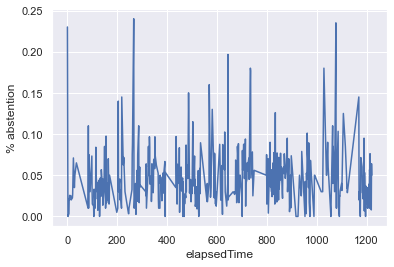

In [16]:
import seaborn as sns
sns.set_theme()
sns.lineplot(data=df_scrutin.groupby('date_scrutin').mean(), x="elapsedTime", y="% abstention")

A continuer